In [50]:
import sys
sys.path.insert(0,'../scripts/')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from graph import draw

In [51]:
db = pd.read_csv('../data/cleaner_telecom.csv', na_values=['?', None])
db.head()

,Unnamed: 0,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total_Uploads,Total_Downloads,Uploads,Downloads,Youtube_Total_Data,...,Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI,Total UL and DL,Start,End,Avg Delay (ms),Activity_Duration(ms)
0,0,3.360100e+10,1,36.749740,480.62408,36.749740,480.62408,36.749740,480.62408,18.355944,...,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13,345.62940,2019-04-04 12:01:18,2019-04-25 14:35:31,47.0,76.410995
1,1,3.360100e+10,1,53.800392,1180.28920,53.800392,1180.28920,53.800392,1180.28920,39.359123,...,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13,707.18536,2019-04-09 13:04:04,2019-04-25 08:15:48,70.0,3.728000
2,2,3.360100e+10,1,27.883638,690.49994,27.883638,690.49994,27.883638,690.49994,34.425236,...,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13,307.69098,2019-04-09 17:42:11,2019-04-25 11:58:13,50.0,0.000000
3,3,3.360101e+10,1,43.324220,1595.06840,43.324220,1595.06840,43.324220,1595.06840,36.534767,...,undefined,undefined,T21824A,2.082014e+14,3.535661e+13,889.35270,2019-04-10 00:31:25,2019-04-25 07:36:35,50.0,41.211998
4,4,3.360101e+10,2,38.542816,1119.84810,38.542816,1119.84810,38.542816,1119.84810,34.222250,...,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13,607.68140,2019-04-12 20:10:23,2019-04-25 10:40:32,50.0,0.000000


# Exploring Data

In [30]:
#we have to see the outline of the data before cleaning
db.columns.tolist()

['Unnamed: 0',
 'MSISDN/Number',
 'no.of xDR sessions',
 'Total Uploads',
 'Total Downloads',
 'Total_Uploads',
 'Total_Downloads',
 'Uploads',
 'Downloads',
 'Youtube_Total_Data',
 'Google_Total_Data',
 'Email_Total_Data',
 'Social_Media_Total_Data',
 'Netflix_Total_Data',
 'Gaming_Total_Data',
 'Other_Total_Data',
 'Avg Throughput (kbps)',
 'Handset Manufacturer',
 'Handset Type',
 'Last Location Name',
 'IMSI',
 'IMEI',
 'Total UL and DL',
 'Start',
 'End',
 'Avg Delay (ms)',
 'Activity_Duration(ms)']

In [31]:
#explore the various data points by describing the data
db.shape

(106856, 27)

# Handling Missing values

In [32]:
def percent_missing(df):
    total_cells= np.product(df.shape)       #total number of cells in the dataframe
    
    missing_count= df.isnull().sum()        #sum of empty cells  per column
    
    totally_missing = missing_count.sum()   #total of all missing in the dataframe 
    
    print("The Dataset contains", round(((totally_missing/total_cells) * 100), 2), "%", "missing values.")  #totally_missing percentage

percent_missing(db)
    
    

The Dataset contains 0.0 % missing values.


# Transforming Data

In [33]:
#SCALING
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
1106,129.496591
1894,11.732351
818,92.907625
917,14.798014
1330,267.868470


In [34]:
original_data[0].min(), original_data[0].max()

(0.08606829135925231, 1541.0096677053505)

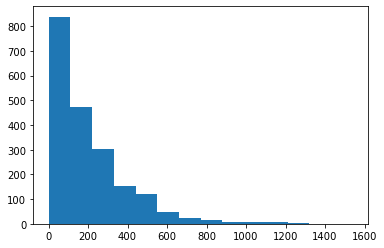

In [35]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

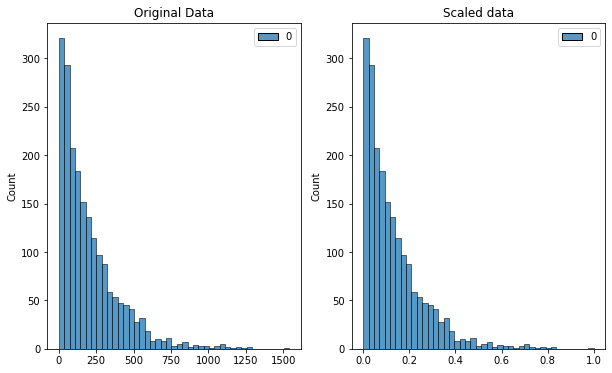

In [36]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

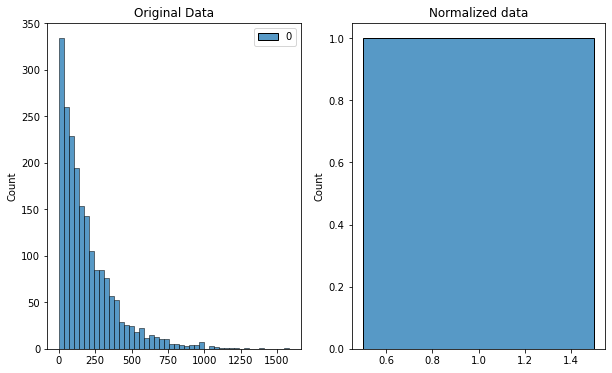

In [12]:
#NORMALIZATION

from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [37]:
# check datatypes
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               106856 non-null  int64  
 1   MSISDN/Number            106856 non-null  float64
 2   no.of xDR sessions       106856 non-null  int64  
 3   Total Uploads            106856 non-null  float64
 4   Total Downloads          106856 non-null  float64
 5   Total_Uploads            106856 non-null  float64
 6   Total_Downloads          106856 non-null  float64
 7   Uploads                  106856 non-null  float64
 8   Downloads                106856 non-null  float64
 9   Youtube_Total_Data       106856 non-null  float64
 10  Google_Total_Data        106856 non-null  float64
 11  Email_Total_Data         106856 non-null  float64
 12  Social_Media_Total_Data  106856 non-null  float64
 13  Netflix_Total_Data       106856 non-null  float64
 14  Gami

# Exploration 

In [38]:
dfExp = db.copy()
dfExp

,Unnamed: 0,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total_Uploads,Total_Downloads,Uploads,Downloads,Youtube_Total_Data,...,Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI,Total UL and DL,Start,End,Avg Delay (ms),Activity_Duration(ms)
0,0,3.360100e+10,1,36.749740,480.62408,36.749740,480.62408,36.749740,480.62408,18.355944,...,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13,345.62940,2019-04-04 12:01:18,2019-04-25 14:35:31,47.0,76.410995
1,1,3.360100e+10,1,53.800392,1180.28920,53.800392,1180.28920,53.800392,1180.28920,39.359123,...,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13,707.18536,2019-04-09 13:04:04,2019-04-25 08:15:48,70.0,3.728000
2,2,3.360100e+10,1,27.883638,690.49994,27.883638,690.49994,27.883638,690.49994,34.425236,...,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13,307.69098,2019-04-09 17:42:11,2019-04-25 11:58:13,50.0,0.000000
3,3,3.360101e+10,1,43.324220,1595.06840,43.324220,1595.06840,43.324220,1595.06840,36.534767,...,undefined,undefined,T21824A,2.082014e+14,3.535661e+13,889.35270,2019-04-10 00:31:25,2019-04-25 07:36:35,50.0,41.211998
4,4,3.360101e+10,2,38.542816,1119.84810,38.542816,1119.84810,38.542816,1119.84810,34.222250,...,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13,607.68140,2019-04-12 20:10:23,2019-04-25 10:40:32,50.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,106851,3.379000e+10,1,50.528850,871.01940,50.528850,871.01940,50.528850,871.01940,24.109232,...,Apple,Apple iPhone 6 Plus (A1524),D79698A,2.082017e+14,3.592491e+13,349.05720,2019-04-27 12:29:02,2019-04-29 10:52:19,1106.0,15.715000
106852,106852,3.379000e+10,1,43.206300,956.12280,43.206300,956.12280,43.206300,956.12280,23.704700,...,Apple,Apple iPhone 6S (A1688),D72312C,2.082015e+14,3.561371e+13,197.80980,2019-04-27 12:29:08,2019-04-29 08:23:38,39.0,80.697010
106853,106853,3.197021e+12,1,41.173542,655.69380,41.173542,655.69380,41.173542,655.69380,23.619537,...,undefined,undefined,L35995B,2.082019e+14,3.536981e+13,132.33066,2019-04-27 12:29:20,2019-04-29 12:06:29,50.0,0.000000
106854,106854,3.370000e+14,1,49.497055,832.70605,49.497055,832.70605,49.497055,832.70605,36.713303,...,Apple,Apple iPhone 8 Plus (A1897),T40137A,2.082010e+14,3.594021e+13,422.91077,2019-04-27 12:29:22,2019-04-29 09:55:38,45.0,44.640003


In [41]:
dfExp.dtypes

Unnamed: 0                   int64
MSISDN/Number              float64
no.of xDR sessions           int64
Total Uploads              float64
Total Downloads            float64
Total_Uploads              float64
Total_Downloads            float64
Uploads                    float64
Downloads                  float64
Youtube_Total_Data         float64
Google_Total_Data          float64
Email_Total_Data           float64
Social_Media_Total_Data    float64
Netflix_Total_Data         float64
Gaming_Total_Data          float64
Other_Total_Data           float64
Avg Throughput (kbps)      float64
Handset Manufacturer        object
Handset Type                object
Last Location Name          object
IMSI                       float64
IMEI                       float64
Total UL and DL            float64
Start                       object
End                         object
Avg Delay (ms)             float64
Activity_Duration(ms)      float64
dtype: object

# Univariate Analysis

## Total UL and DL

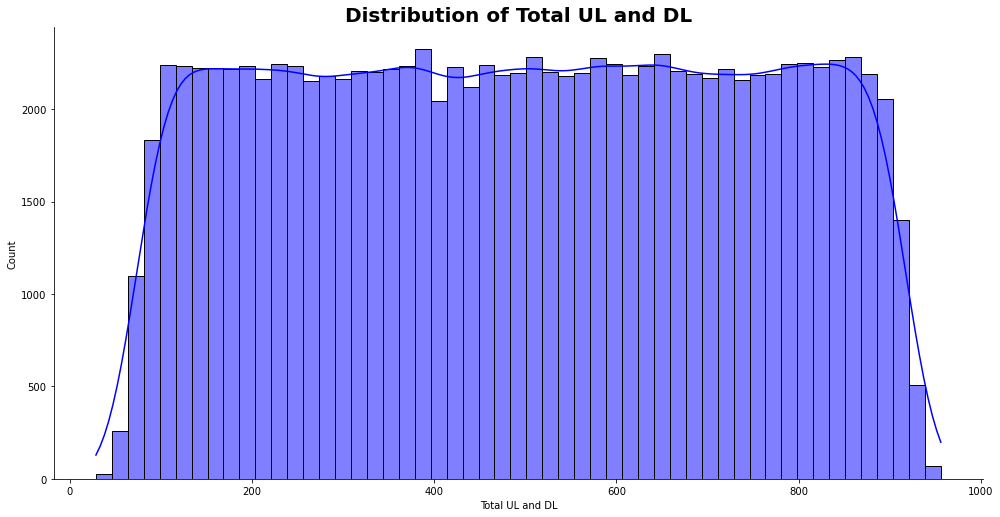

In [52]:
draw.plot_hist(dfExp, 'Total UL and DL', 'blue')